In [1]:
import astropy.units as u
import h5py
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import G

In [2]:
data = h5py.File("cutout_598597.hdf5", 'r')

In [3]:
data['PartType1']['SubfindDensity'][:10]
h = data['Header'].attrs['HubbleParam']
m = data['Header'].attrs['MassTable'][1]  / h * u.solMass * 10**10
a = data['Header'].attrs['Time']


print(h)
print(m)
print(a)

0.6774
538464.1418081385 solMass
0.9999999999999998


In [4]:
coords = data['PartType1']['Coordinates'][:] / h


In [5]:
def pot_x(x, coords): 
    x_n = np.array([x])
    x_i = np.repeat(x_n, len(coords), axis=0)
    return np.sum((- G*m /np.sqrt(np.sum((x_i - coords)**2, axis=1)) / u.kpc).to(u.m**2 / u.s**2))

In [6]:
l = data['Header'].attrs['BoxSize']

com_coord = np.sum(coords,axis=0) / len(coords)
coords_centred = coords - com_coord
com_dist = np.sqrt(np.sum(coords_centred**2, axis=1))

r_min = np.min(com_dist)
r_max = np.max(com_dist)

x_ = np.linspace(0, l, 10)
y_ = np.linspace(0, l, 10)
z_ = np.linspace(0, l, 10)
potentials = []
rs = []

for x in x_:
    for y in y_:
        for z in z_:
            potentials.append(pot_x(np.array([x, y, z]), coords) * u.s**2 / u.m**2)
            
            rs.append(np.sqrt((x - com_coord[0])**2 + (y - com_coord[1])**2 + (z - com_coord[2])**2))

In [7]:
print(com_dist)
print(l)

[ 0.48711545  0.3468387   0.3368369  ... 57.83420708 32.42127932
 69.36341699]
35000.0


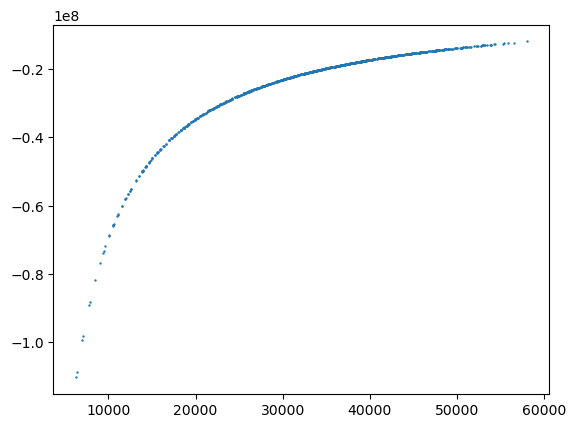

In [8]:
fig, ax = plt.subplots()
ax.scatter(rs, potentials, s = 0.5)
plt.show()

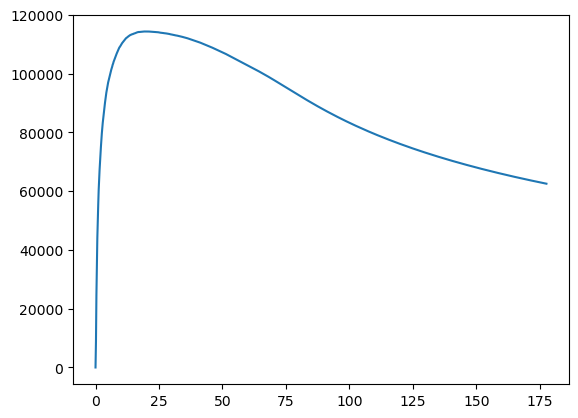

In [13]:
rs = np.linspace(0.0000001, r_max, 1000)
v_s = []
for r in rs:
    masses = (com_dist < r).sum()
    v_s.append((np.sqrt(G * m * masses /(r * u.kpc)).to(u.m/u.s))*u.s /u.m)
fig, ax = plt.subplots()
ax.plot(rs, v_s)
plt.show()